In [26]:
import sys
sys.path.append('/home/elilouis/sublimationofsnow')
import sosutils
import pandas as pd
import datetime as dt
import xarray as xr

import altair as alt
import matplotlib.pyplot as plt

In [39]:
sos_download_dir='/data2/elilouis/sublimationofsnow/sosnoqc'
DATE_FORMAT_STR = '%Y%m%d'
datelist = ["20230218", "20230219", "20230220"]

In [40]:
VARIABLE_NAMES = [  
    'spd_1m_ue',     'dir_1m_ue',     'u_1m_ue',   'v_1m_ue',   'w_1m_ue',   'u_w__1m_ue',    'v_w__1m_ue',  'u_tc__1m_ue',  'v_tc__1m_ue',   'u_h2o__1m_ue',  'v_h2o__1m_ue',   'w_tc__1m_ue',   'w_h2o__1m_ue',
    'spd_3m_ue',     'dir_3m_ue',     'u_3m_ue',   'v_3m_ue',   'w_3m_ue',   'u_w__3m_ue',    'v_w__3m_ue',  'u_tc__3m_ue',  'v_tc__3m_ue',   'u_h2o__3m_ue',  'v_h2o__3m_ue',   'w_tc__3m_ue',   'w_h2o__3m_ue',
    'spd_10m_ue',    'dir_10m_ue',    'u_10m_ue',  'v_10m_ue',  'w_10m_ue',  'u_w__10m_ue',   'v_w__10m_ue', 'u_tc__10m_ue', 'v_tc__10m_ue',  'u_h2o__10m_ue', 'v_h2o__10m_ue',  'w_tc__10m_ue',  'w_h2o__10m_ue',
    
    'tc_1m_ue', 'tc_3m_ue', 'tc_10m_ue',

    'P_10m_ue',

    'SF_avg_1m_ue', 'SF_avg_2m_ue',

    'T_1m_c', 'T_2m_c', 'T_3m_c', 'T_4m_c', 'T_5m_c', 'T_6m_c', 'T_7m_c', 'T_8m_c', 'T_9m_c', 'T_10m_c', 
    'T_11m_c', 'T_12m_c', 'T_13m_c', 'T_14m_c', 'T_15m_c','T_16m_c', 'T_17m_c', 'T_18m_c', 'T_19m_c', 'T_20m_c',

    'RH_1m_c', 'RH_2m_c', 'RH_3m_c', 'RH_4m_c', 'RH_5m_c', 'RH_6m_c', 'RH_7m_c', 'RH_8m_c', 'RH_9m_c', 'RH_10m_c', 
    'RH_11m_c','RH_12m_c','RH_13m_c','RH_14m_c','RH_15m_c','RH_16m_c','RH_17m_c','RH_18m_c','RH_19m_c', 'RH_20m_c',

    'SWE_p1_c', 'SWE_p2_c', 'SWE_p3_c', 'SWE_p4_c',

]

In [41]:
datasets = [xr.open_dataset(sosutils.download_sos_data_day(date, sos_download_dir, cache=True))[VARIABLE_NAMES] for date in datelist]

Caching...skipping download for 20230218
Caching...skipping download for 20230219
Caching...skipping download for 20230220


In [42]:
sos_ds = sosutils.merge_datasets_with_different_variables(datasets, dim='time')

In [43]:
sos_ds_60min = sos_ds.resample(time='60Min').median() # NOTE: MEDIAN HERE
sos_tidy_df_60min = sosutils.get_tidy_dataset(sos_ds_60min, VARIABLE_NAMES)

In [44]:
sos_df = sos_ds.to_dataframe().reset_index()

In [45]:
tidy_df = sosutils.get_tidy_dataset(sos_ds, VARIABLE_NAMES)

In [46]:
tidy_df.variable.unique()

array(['spd_1m_ue', 'dir_1m_ue', 'u_1m_ue', 'v_1m_ue', 'w_1m_ue',
       'u_w__1m_ue', 'v_w__1m_ue', 'u_tc__1m_ue', 'v_tc__1m_ue',
       'u_h2o__1m_ue', 'v_h2o__1m_ue', 'w_tc__1m_ue', 'w_h2o__1m_ue',
       'spd_3m_ue', 'dir_3m_ue', 'u_3m_ue', 'v_3m_ue', 'w_3m_ue',
       'u_w__3m_ue', 'v_w__3m_ue', 'u_tc__3m_ue', 'v_tc__3m_ue',
       'u_h2o__3m_ue', 'v_h2o__3m_ue', 'w_tc__3m_ue', 'w_h2o__3m_ue',
       'spd_10m_ue', 'dir_10m_ue', 'u_10m_ue', 'v_10m_ue', 'w_10m_ue',
       'u_w__10m_ue', 'v_w__10m_ue', 'u_tc__10m_ue', 'v_tc__10m_ue',
       'u_h2o__10m_ue', 'v_h2o__10m_ue', 'w_tc__10m_ue', 'w_h2o__10m_ue',
       'tc_1m_ue', 'tc_3m_ue', 'tc_10m_ue', 'P_10m_ue', 'SF_avg_1m_ue',
       'SF_avg_2m_ue', 'T_1m_c', 'T_2m_c', 'T_3m_c', 'T_4m_c', 'T_5m_c',
       'T_6m_c', 'T_7m_c', 'T_8m_c', 'T_9m_c', 'T_10m_c', 'T_11m_c',
       'T_12m_c', 'T_13m_c', 'T_14m_c', 'T_15m_c', 'T_16m_c', 'T_17m_c',
       'T_18m_c', 'T_19m_c', 'T_20m_c', 'RH_1m_c', 'RH_2m_c', 'RH_3m_c',
       'RH_4m_c', 'RH_5m

In [47]:
alt.data_transformers.enable("json")
alt.data_transformers.disable_max_rows()
alt.renderers.enable('svg')

RendererRegistry.enable('svg')

In [48]:
tidy_df[tidy_df.variable.isin(['SWE_p1_c', 'SWE_p2_c', 'SWE_p3_c', 'SWE_p4_c'])]

,time,variable,value,height,tower,measurement
73440,2023-02-18 00:02:30,SWE_p1_c,312.064392,NaN,c,None
73441,2023-02-18 00:07:30,SWE_p1_c,NaN,NaN,c,None
73442,2023-02-18 00:12:30,SWE_p1_c,NaN,NaN,c,None
73443,2023-02-18 00:17:30,SWE_p1_c,312.184814,NaN,c,None
73444,2023-02-18 00:22:30,SWE_p1_c,NaN,NaN,c,None
...,...,...,...,...,...,...
76891,2023-02-20 23:37:30,SWE_p4_c,253.291504,NaN,c,None
76892,2023-02-20 23:42:30,SWE_p4_c,NaN,NaN,c,None
76893,2023-02-20 23:47:30,SWE_p4_c,NaN,NaN,c,None
76894,2023-02-20 23:52:30,SWE_p4_c,253.463898,NaN,c,None


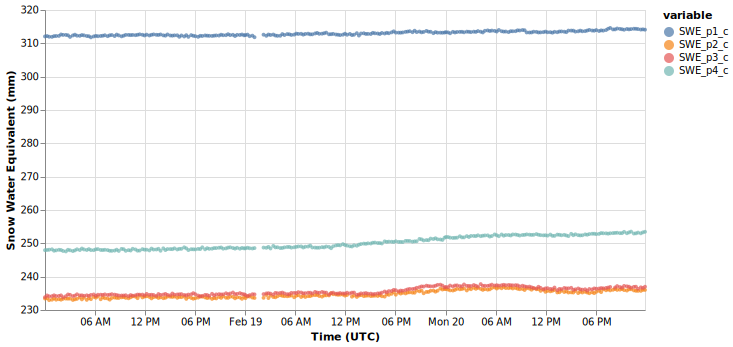

In [49]:
alt.Chart(tidy_df).transform_filter(
    alt.FieldOneOfPredicate('variable', ['SWE_p1_c', 'SWE_p2_c', 'SWE_p3_c', 'SWE_p4_c'])
).mark_circle(size=15).encode(
    alt.X("time:T", title='Time (UTC)'),
    alt.Y('value:Q', title='Snow Water Equivalent (mm)', scale=alt.Scale(zero=False)),
    alt.Color("variable:N")
).properties(width=600)